In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow 
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.layers import LSTM, Flatten, concatenate, Dense, Conv1D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import TfidfVectorizer 
import datetime, os
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/nyc pics/preprocessed_data.csv")

In [3]:
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
data.shape

(109248, 9)

In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=1)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)


# School State encoding 

In [7]:
# Knowing unique values in school_state
print(len(X_train['school_state'].unique()))
vocab_size_state = 51

51


In [8]:
# Encode the column using label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
encoded_train_school_state=labelencoder.fit_transform(X_train['school_state'])
encoded_train_school_state.shape

(87398,)

In [9]:
# Similarly do for test data 
encoded_test_school_state=labelencoder.transform(X_test['school_state'])
encoded_test_school_state.shape

                        


(21850,)

# project grade category 

In [10]:
# Knowing unique values in project_grade_category
len(X_train['project_grade_category'].unique())
vocab_size_grade_category = 4

In [11]:
# Encode target label 
encoded_train_grade_category=labelencoder.fit_transform(X_train['project_grade_category'])
encoded_train_grade_category.shape

(87398,)

In [12]:
# Similarly do it for test data
encoded_test_grade_category=labelencoder.transform(X_test['project_grade_category'])
encoded_test_grade_category.shape

(21850,)

# Clean_Categories

In [13]:
len(X_train['clean_categories'].unique())

51

In [14]:
vocab_size_clean_categories=51

In [15]:
# Encode target label 
encoded_train_clean_category=labelencoder.fit_transform(X_train['clean_categories'])
encoded_train_clean_category.shape

(87398,)

In [16]:
# Reference: https://scikit-learn-general.narkive.com/iilwOx3l/labelencoder-with-never-seen-before-values
# Similarly do it for test data
X_test['clean_categories'] = X_test['clean_categories'].map(lambda s: '<unknown>' if s not in labelencoder.classes_ else s)
labelencoder.classes_ = np.append(labelencoder.classes_, '<unknown>')
encoded_test_clean_category = labelencoder.transform(X_test['clean_categories'])
encoded_test_clean_category.shape

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(21850,)

#  Clean_Subcategories

In [17]:
len(X_train['clean_subcategories'].unique())

392

In [39]:
vocab_size_clean_subcategories=392

In [40]:
# Encode target label 
encoded_train_clean_subcategory=labelencoder.fit_transform(X_train['clean_subcategories'])
encoded_train_clean_subcategory.shape

(87398,)

In [41]:
# Reference: https://scikit-learn-general.narkive.com/iilwOx3l/labelencoder-with-never-seen-before-values
# Similarly do it for test data
X_test['clean_subcategories'] = X_test['clean_subcategories'].map(lambda s: '<unknown>' if s not in labelencoder.classes_ else s)
labelencoder.classes_ = np.append(labelencoder.classes_, '<unknown>')
encoded_test_clean_subcategory = labelencoder.transform(X_test['clean_subcategories'])
encoded_test_clean_subcategory.shape

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(21850,)

# Teacher prefix

In [42]:
len(X['teacher_prefix'].unique())

5

In [43]:
# encoding for  column
# integer encode the documents
vocab_size_teacher_prefix = 5
# Encode target label 
encoded_train_teacher_prefix=labelencoder.fit_transform(X_train['teacher_prefix'])
encoded_train_teacher_prefix.shape

(87398,)

In [44]:
encoded_test_teacher_prefix=labelencoder.transform(X_test['teacher_prefix'])
encoded_test_teacher_prefix.shape

(21850,)

# Essay

In [45]:
# prepare tokenizer 
t = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n') # add all characters except _
t.fit_on_texts(X_train['essay']) # using only train dataset of column essay
vocab_size_essay = len(t.word_index) + 1
#print(vocab_size_essay)

In [46]:
# integer encode the documents
encoded_essay_train = t.texts_to_sequences(X_train['essay']) # using complete dataset of column essay for integer encoding
#print(encoded_docs)

In [47]:
# For considering length for padding getting number of words count in each row and then taking mean of it
data['totalwords'] = data['essay'].str.split().str.len()
data['totalwords'].mean()

151.40636899531341

In [48]:
# pad documents to a max length of 151 words
max_length = 151
padded_essay_train = pad_sequences(encoded_essay_train, maxlen=max_length, padding='post')
#print(padded_essay_train)

In [49]:
#please use below code to load glove vectors and whole embedding into memory as a dictionary of word to embedding array.
import pickle
import numpy as np
embeddings_index = dict()
f=open('C:/Users/shwer/OneDrive/Desktop/nyc pics/glove.6B.300d.txt',encoding="utf8") # opening glove vector file
for line in f: # looping through each line in the file
    values = line.split() # splitting by space
    word = values[0] # is the word
    coefs = np.asarray(values[1:], dtype='float32') # is the array vector assoicated with it
    embeddings_index[word] = coefs # dictionary with key as word from file and value is the array vector associated with the word
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [50]:
# create a weight matrix for words in training docs
# create a matrix of one embedding for each word in the training dataset
# We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.
embedding_matrix = np.zeros((vocab_size_essay, 300)) 
for word, i in t.word_index.items(): # getting each word from training dataset word is the word in tarining set and i is incremental index
    #print(word,i)
    embedding_vector = embeddings_index.get(word) # getting the vector for that same word from previous step (glove vectors)
    # print(embedding_vector)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector # add corresponding vector value for that associated word

In [51]:
embedding_matrix



array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.45381001, -0.0073266 ,  0.27498001, ..., -0.32387   ,
        -0.25544   , -0.19268   ],
       [-0.13292   ,  0.16985001, -0.1436    , ..., -0.23778   ,
         0.14766   ,  0.62901998],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.046025  ,  0.22147   , -0.35194001, ..., -0.069502  ,
         0.24991   ,  0.29221001],
       [ 0.075115  ,  0.51563001,  0.0016161 , ...,  0.1078    ,
         0.47312   ,  0.39956999]])

In [52]:
# integer encode the documents
encoded_essay_test = t.texts_to_sequences(X_test['essay'])
#print(encoded_docs)
padded_essay_test = pad_sequences(encoded_essay_test, maxlen=max_length, padding='post')

In [53]:
# Reference: Decision Tree Assignment
# Numerical columns

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

# Train data for 2 numerical columns
X_train_price = X_train['price'].values.reshape(-1,1)
X_train_previously_posted = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

# Test data for 2 numerical columns
X_test_price = X_test['price'].values.reshape(-1,1)
X_test_previously_posted = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

# Concatenating 2 numerical columns for train and test data
numerical_feat_train = np.concatenate((X_train_price, X_train_previously_posted), axis=1) # column wise
numerical_feat_test = np.concatenate((X_test_price, X_test_previously_posted), axis=1) # Column wise

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
numeric_norm_train = normalizer.fit_transform(numerical_feat_train)
numeric_norm_test = normalizer.transform(numerical_feat_test)

In [54]:
# Model building
tensorflow.keras.backend.clear_session()
init = tensorflow.keras.initializers.he_normal()
regularizer = tensorflow.keras.regularizers.l2(0.09)


# essay
input_essay=Input(shape=(151,))
embedding_essay = Embedding(vocab_size_essay, 300, weights=[embedding_matrix], input_length=151, trainable=False)(input_essay)
lstm_layer=LSTM(64, return_sequences=True, return_state=False)(embedding_essay)
flat_essay=Flatten()(lstm_layer)


# teacher prefix
input_teacher_prefix=Input(shape=(1,))
embedding_teacher_prefix = Embedding(vocab_size_teacher_prefix, 50, input_length=1,trainable=True)(input_teacher_prefix)
flat_teacher_prefix=Flatten()(embedding_teacher_prefix)

# clean subcategories
input_clean_subcategories=Input(shape=(1,))
# vocab+1 bcoz 1 for unknown unsee in test data
embedding_clean_subcategories = Embedding(vocab_size_clean_subcategories+1, 50, input_length=392,trainable=True)(input_clean_subcategories)
flat_clean_subcategories=Flatten()(embedding_clean_subcategories)

# clean categories
input_clean_categories=Input(shape=(1,))
# vocab+1 bcoz 1 for unknown unsee in test data
embedding_clean_categories = Embedding(vocab_size_clean_categories+1, 50, input_length=51,trainable=True)(input_clean_categories)
flat_clean_categories=Flatten()(embedding_clean_categories)

# Project grade category
input_grade_category=Input(shape=(1,))
embedding_project_grade_category = Embedding(vocab_size_grade_category, 50, input_length=1,trainable=True)(input_grade_category)
flat_grade_category=Flatten()(embedding_project_grade_category)

# State
input_school_state=Input(shape=(1,)) # 1 column
embedding_state = Embedding(vocab_size_state, 50, input_length=1)(input_school_state)
flatten_state=Flatten()(embedding_state)

# Numerical features
input_numeric=Input(shape=(2,)) # since 2 numerical columns 
dense_numeric=Dense(10,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(input_numeric)

# Concatenate
merged_1 = concatenate([flatten_state, flat_grade_category,flat_clean_categories,flat_clean_subcategories,flat_teacher_prefix,flat_essay,dense_numeric])
dense1=Dense(128,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(merged_1)
droput1=Dropout(0.4)(dense1)
dense2=Dense(256,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(droput1)
droput2=Dropout(0.5)(dense2)
dense3=Dense(32,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(droput2)
output=Dense(2,activation='softmax')(dense3)


model = Model(inputs=[input_essay, input_teacher_prefix, input_clean_subcategories, input_clean_categories, input_grade_category,input_school_state, input_numeric], outputs=output)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 151)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

In [55]:
# train and test data
train_data=[padded_essay_train,encoded_train_teacher_prefix,encoded_train_clean_subcategory,encoded_train_clean_category,encoded_train_grade_category,encoded_train_school_state,numeric_norm_train]
test_data=[padded_essay_test,encoded_test_teacher_prefix,encoded_test_clean_subcategory, encoded_test_clean_category,encoded_test_grade_category,encoded_test_school_state,numeric_norm_test]

In [56]:
# Reference: https://www.codegrepper.com/code-examples/python/keras+auc+without+tf.metrics.auc
from sklearn.metrics import roc_auc_score

def auc(y_true, y_pred):
    return tensorflow.py_function(roc_auc_score, (y_true, y_pred), tensorflow.double)

In [57]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auc])

In [58]:
 # Early stopping if validation accuracy is not improving in last 2 epochs
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_auc', patience=2, verbose=1,mode='max')
# Reference: https://stackoverflow.com/questions/54330586/training-keras-model-with-multiple-inputs
history=model.fit(train_data,tensorflow.keras.utils.to_categorical(y_train, 2),
          validation_data=(test_data,tensorflow.keras.utils.to_categorical(y_test, 2)),epochs=15,batch_size=600,verbose=1,callbacks=[earlystop])

Train on 87398 samples, validate on 21850 samples
Epoch 1/15
87398/87398 [==============================] - 304s 3ms/sample - loss: 26.0665 - auc: 0.6421 - val_loss: 8.7221 - val_auc: 0.7102
Epoch 2/15
87398/87398 [==============================] - 282s 3ms/sample - loss: 4.7563 - auc: 0.7063 - val_loss: 2.6421 - val_auc: 0.7238
Epoch 3/15
87398/87398 [==============================] - 288s 3ms/sample - loss: 2.0792 - auc: 0.7181 - val_loss: 1.7429 - val_auc: 0.7259
Epoch 4/15
87398/87398 [==============================] - 288s 3ms/sample - loss: 1.5638 - auc: 0.7258 - val_loss: 1.4215 - val_auc: 0.7310
Epoch 5/15
87398/87398 [==============================] - 286s 3ms/sample - loss: 1.3116 - auc: 0.7321 - val_loss: 1.2058 - val_auc: 0.7345
Epoch 6/15
87398/87398 [==============================] - 325s 4ms/sample - loss: 1.1205 - auc: 0.7371 - val_loss: 1.0316 - val_auc: 0.7367
Epoch 7/15
87398/87398 [==============================] - 286s 3ms/sample - loss: 0.9602 - auc: 0.7405 - val_

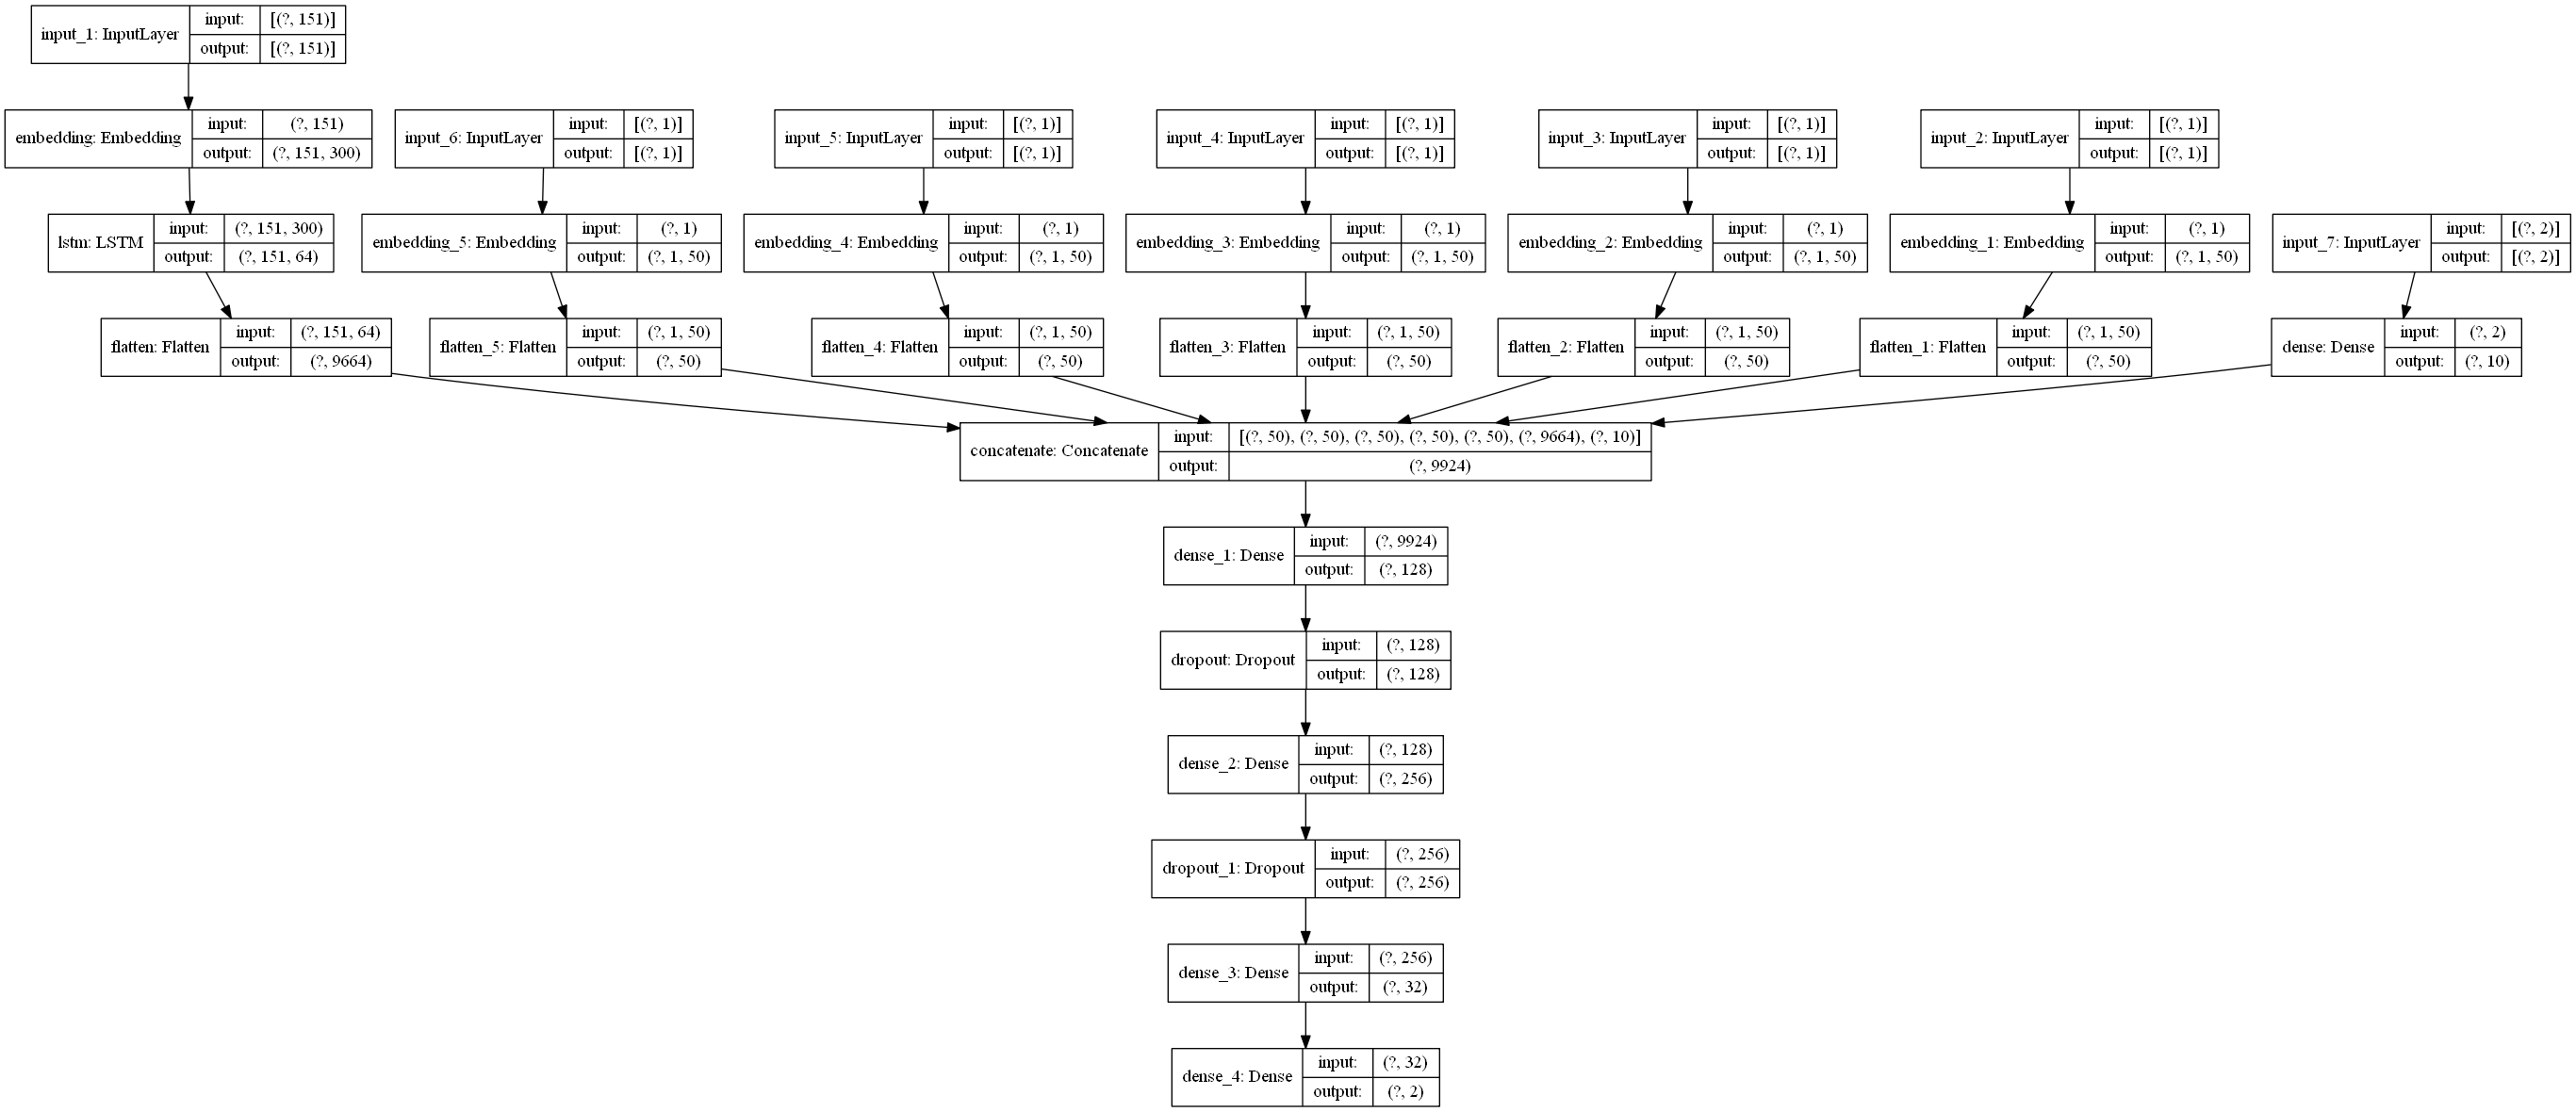

In [59]:
# plot model
plot_model(model,to_file='C:/Users/shwer/OneDrive/Desktop/nyc pics/Documents/lstm_model1.png', show_shapes=True,show_layer_names=True)

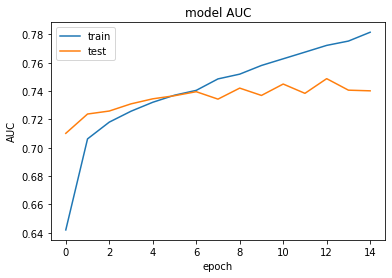

In [60]:
# Reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for Auc
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observations:
<b> AUC score is increasing at fast in the begining then increasing and decreasing constantly.</b>

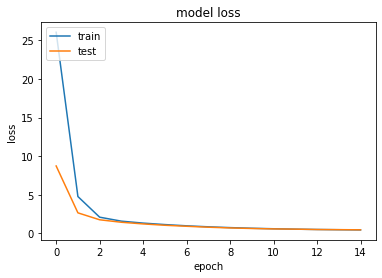

In [61]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observations:
<b> Loss is decreasing at higher rate at the start but then it is decreasing at a very lower rate for later epochs. </b>

# Model 2

In [62]:
# Removing words in essay column having low and high idf scores

In [63]:
# Reference https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2)
vectorizer.fit_transform(X_train['essay'])
#print(vectorizer.get_feature_names()) # list of all words
#print(vectorizer.idf_.min()) # idf values 
len(vectorizer.get_feature_names())

31373

In [64]:
words_idf = dict(zip(vectorizer.get_feature_names(),vectorizer.idf_))

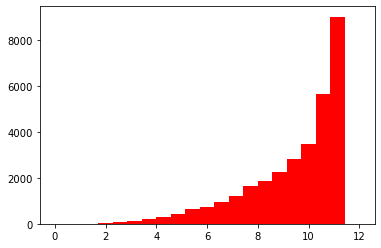

In [65]:
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# Reference: https://stackoverflow.com/questions/19442224/getting-information-for-bins-in-matplotlib-histogram-function/19446368
import math
import matplotlib.pyplot as plt
num_bins = math.ceil((vectorizer.idf_.max()-vectorizer.idf_.min())/0.5)
# n: counts of values/points in each bins
# bins that is returned defines the edges of each bin that was used.
n, bins, patches = plt.hist(vectorizer.idf_, num_bins ,facecolor='red', range=(0, int(vectorizer.idf_.max()+1)))
plt.show()

In [66]:
bins

array([ 0.        ,  0.57142857,  1.14285714,  1.71428571,  2.28571429,
        2.85714286,  3.42857143,  4.        ,  4.57142857,  5.14285714,
        5.71428571,  6.28571429,  6.85714286,  7.42857143,  8.        ,
        8.57142857,  9.14285714,  9.71428571, 10.28571429, 10.85714286,
       11.42857143, 12.        ])

In [67]:
n

array([0.000e+00, 2.000e+00, 1.100e+01, 3.000e+01, 8.000e+01, 1.140e+02,
       2.150e+02, 2.840e+02, 4.190e+02, 6.410e+02, 7.350e+02, 9.550e+02,
       1.198e+03, 1.658e+03, 1.855e+03, 2.234e+03, 2.828e+03, 3.465e+03,
       5.636e+03, 9.013e+03, 0.000e+00])

In [68]:
# Need to see in each bins range of idf scores how many words are there so it will helpful to remove words with low and high idf scores.

for bin in range(len(bins)-1): 
    print("Bin : ",bin+1)
    print("Range : {} - {}".format(round(bins[bin],3), round(bins[bin+1],3))) 
    # Printing number of words in each bin and also how much its consistutes to total % of words
    print("No of words : {} which is {} % of total".format(n[bin], round((n[bin]*100)/len(vectorizer.get_feature_names()),3)))
    # Printing 10 words for with idf score which is in the range of bin(idf score)
    print("Top 10 words : ")
    d={}
    # Getting 10 words for each bin 
    for word,score in words_idf.items():
        if score>=bins[bin] and score<=bins[bin+1]:
            d[word]=score
    print(dict(sorted(d.items(),key=lambda x: x[1],reverse=True)[:10]))
    print("*"*100)
    

Bin :  1
Range : 0.0 - 0.571
No of words : 0.0 which is 0.0 % of total
Top 10 words : 
{}
****************************************************************************************************
Bin :  2
Range : 0.571 - 1.143
No of words : 2.0 which is 0.006 % of total
Top 10 words : 
{'nannan': 1.0452420775855247, 'students': 1.0079030909306774}
****************************************************************************************************
Bin :  3
Range : 1.143 - 1.714
No of words : 11.0 which is 0.035 % of total
Top 10 words : 
{'need': 1.6678516842926545, 'many': 1.577480569357545, 'help': 1.5130477959937951, 'they': 1.5012868662457726, 'the': 1.4691870197764088, 'learn': 1.4603183069689416, 'not': 1.4476531824892476, 'classroom': 1.394286277332384, 'learning': 1.3649520893357714, 'my': 1.24496482817553}
****************************************************************************************************
Bin :  4
Range : 1.714 - 2.286
No of words : 30.0 which is 0.096 % of total
To

# Observations:
<b><br> Bin 1 - Bin 6 doesn't contain much words.</b></br>
<b><br> Bin 17 - 21 has most of words as numbers </b></br>
<b><br>Deleting words which are present in given bins</b></br>

In [69]:
# Removing words which are present within this specified bins
# Reference: https://stackoverflow.com/questions/56156260/how-to-find-and-remove-words-which-have-low-and-high-idf-values
idf_scores=vectorizer.idf_
filtered_indices = np.argwhere(((idf_scores> 3.428) & (idf_scores<9.143) ))
filtered_indices = [idx[0] for idx in filtered_indices]

#list of vocabulary from the vectorizer
vocabulary = vectorizer.get_feature_names()

#preparing a set with filtered vocabulary
filtered_voc = {vocabulary[i] for i in filtered_indices}



In [70]:
filtered_text_list = []
for text in X_train['essay']:
    text_word_list = [word for word in text.split() if word in filtered_voc]
    filtered_text_list.append(' '.join(text_word_list))

In [71]:
filtered_text_list[1]

'risk expectations regardless economic background goals especially pleasure thematic units usually beyond expected incorporated targets meeting standards fortunate brand old included several literally falling apart exciting seeing faces each lcd projector document camera three pc computers generation ipads digital usage electronic computer type reports computer computer programs computer essential preparing century connect enables ideas differentiate developmental thus pursue unique integrate arts studies across narratives personal stories drama studies audio photo story presentations utilization multimedia software including image video audio editing deeper understanding creating podcasts shared heard persons'

In [72]:
X_train['update_essay']=filtered_text_list

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
X_train.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,update_essay
68294,mi,mrs,grades_3_5,3,literacy_language,literacy,our school k 5 elementary building rural low i...,166.58,elementary rural qualify light cheerful attitu...
2257,nm,mrs,grades_prek_2,0,literacy_language music_arts,literacy performingarts,our school title i school population high pove...,343.20,risk expectations regardless economic backgrou...
46650,tn,mrs,grades_prek_2,9,health_sports,gym_fitness health_wellness,my class one four kindergarten classes school ...,260.38,four classes located upper tennessee majority ...
85698,mn,mrs,grades_prek_2,106,health_sports,health_wellness,i amazing set reading intervention students gr...,223.28,intervention grades third mn classified price ...
93931,tx,mr,grades_6_8,0,literacy_language,literature_writing,my students eager learn want start recording p...,829.83,start recording professional quality announcem...


In [74]:
filtered_text_list = []
for text in X_test['essay']:
    text_word_list = [word for word in text.split() if word in filtered_voc]
    filtered_text_list.append(' '.join(text_word_list))

In [75]:
X_test['update_essay']=filtered_text_list

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
X_test.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,update_essay
5166,ny,mrs,grades_6_8,0,literacy_language,literacy literature_writing,i teach program students ranging grades 4 9 i ...,134.09,ranging grades plan stock shelves sure inspire...
23206,wa,ms,grades_3_5,21,health_sports,health_wellness,my students come hardworking families this sec...,144.51,hardworking stem responsible studies complete ...
11579,fl,ms,grades_3_5,27,math_science music_arts,health_lifescience visualarts,my students eclectic creative artistic group l...,1175.74,eclectic artistic ambition motivated art grade...
24987,ny,teacher,grades_prek_2,125,health_sports,health_wellness,i teach diverse group students they curious lo...,203.07,curious everything movement enabling stay focu...
61309,mo,ms,grades_prek_2,2,literacy_language math_science,literacy mathematics,tell i forget teach i may remember involve i l...,149.98,tell forget remember involve benjamin franklin...


In [77]:
# Essay for Model2
# prepare tokenizer 
t = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n') # add all characters except _
t.fit_on_texts(X_train['update_essay']) # using only train dataset of column essay
vocab_size_update_essay = len(t.word_index) + 1
#print(vocab_size_essay)

In [78]:
# integer encode the documents
encoded_update_essay_train = t.texts_to_sequences(X_train['update_essay']) # using complete dataset of column essay for integer encoding
#print(encoded_docs)

In [79]:
# For considering length for padding getting number of words count in each row and then taking mean of it
data['totalwords1'] = X_train['update_essay'].str.split().str.len()
data['totalwords1'].mean()

66.10937321220165

In [80]:
# pad documents to a max length of 151 words
max_length_update = 66
padded_update_essay_train = pad_sequences(encoded_update_essay_train, maxlen=max_length_update, padding='post')
#print(padded_essay_train)

In [81]:
#please use below code to load glove vectors and whole embedding into memory as a dictionary of word to embedding array.
import pickle
import numpy as np
embeddings_index1 = dict()
f=open('C:/Users/shwer/OneDrive/Desktop/nyc pics/glove.6B.300d.txt',encoding="utf8") # opening glove vector file
for line in f: # looping through each line in the file
    values = line.split() # splitting by space
    word = values[0] # is the word
    coefs = np.asarray(values[1:], dtype='float32') # is the array vector assoicated with it
    embeddings_index1[word] = coefs # dictionary with key as word from file and value is the array vector associated with the word
f.close()
print('Loaded %s word vectors.' % len(embeddings_index1))

Loaded 400000 word vectors.


In [82]:
# create a weight matrix for words in training docs
# create a matrix of one embedding for each word in the training dataset
# We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.
embedding_matrix1 = np.zeros((vocab_size_update_essay, 300)) 
for word, i in t.word_index.items(): # getting each word from training dataset word is the word in tarining set and i is incremental index
    #print(word,i)
    embedding_vector1 = embeddings_index1.get(word) # getting the vector for that same word from previous step (glove vectors)
    # print(embedding_vector)
    if embedding_vector1 is not None: 
        embedding_matrix1[i] = embedding_vector1 # add corresponding vector value for that associated word

In [83]:
# integer encode the documents
encoded_update_essay_test = t.texts_to_sequences(X_test['update_essay'])
#print(encoded_docs)
padded_update_essay_test = pad_sequences(encoded_update_essay_test, maxlen=max_length_update, padding='post')

In [88]:
# Building model 2
# Model building
tensorflow.keras.backend.clear_session()
init = tensorflow.keras.initializers.he_normal()
regularizer = tensorflow.keras.regularizers.l2(0.08)
input_essay1=Input(shape=(66,))

# essay
embedding_essay = Embedding(vocab_size_update_essay, 300, weights=[embedding_matrix1], input_length=66, trainable=False)(input_essay1)
lstm_layer=LSTM(128, return_sequences=True, return_state=False)(embedding_essay)
flat_essay=Flatten()(lstm_layer)

# teacher prefix
input_teacher_prefix=Input(shape=(1,))
embedding_teacher_prefix = Embedding(vocab_size_teacher_prefix, 50, input_length=1,trainable=True)(input_teacher_prefix)
flat_teacher_prefix=Flatten()(embedding_teacher_prefix)

# clean subcategories
input_clean_subcategories=Input(shape=(1,))
embedding_clean_subcategories = Embedding(vocab_size_clean_subcategories+1, 50, input_length=392,trainable=True)(input_clean_subcategories)
flat_clean_subcategories=Flatten()(embedding_clean_subcategories)

# clean categories
input_clean_categories=Input(shape=(1,))
embedding_clean_categories = Embedding(vocab_size_clean_categories+1, 50, input_length=51,trainable=True)(input_clean_categories)
flat_clean_categories=Flatten()(embedding_clean_categories)

# Project grade category
input_grade_category=Input(shape=(1,))
embedding_project_grade_category = Embedding(vocab_size_grade_category, 50, input_length=1,trainable=True)(input_grade_category)
flat_grade_category=Flatten()(embedding_project_grade_category)

# State
input_school_state=Input(shape=(1,)) # 1 column
embedding_state = Embedding(vocab_size_state, 50, input_length=1)(input_school_state)
flatten_state=Flatten()(embedding_state)

# Numerical features
input_numeric=Input(shape=(2,)) # since 2 numerical columns 
dense_numeric=Dense(128,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(input_numeric)

# Concatenate
merged_1 = concatenate([flatten_state, flat_grade_category,flat_clean_categories,flat_clean_subcategories,flat_teacher_prefix,flat_essay,dense_numeric])
dense1=Dense(128,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(merged_1)
droput1=Dropout(0.4)(dense1)
dense2=Dense(256,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(droput1)
droput2=Dropout(0.5)(dense2)
dense3=Dense(32,activation='relu',kernel_regularizer=regularizer, kernel_initializer=init)(droput2)
output=Dense(2,activation='softmax')(dense3)


model2 = Model(inputs=[input_essay1, input_teacher_prefix, input_clean_subcategories, input_clean_categories, input_grade_category,input_school_state, input_numeric], outputs=output)
print(model2.summary())



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 66)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

In [89]:
# compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auc])

In [90]:
# train and test data
train_data1=[padded_update_essay_train,encoded_train_teacher_prefix,encoded_train_clean_subcategory,encoded_train_clean_category,encoded_train_grade_category,encoded_train_school_state,numeric_norm_train]
test_data1=[padded_update_essay_test,encoded_test_teacher_prefix,encoded_test_clean_subcategory, encoded_test_clean_category,encoded_test_grade_category,encoded_test_school_state,numeric_norm_test]

In [91]:
 # Early stopping if validation accuracy is not improving in last 2 epochs
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_auc', patience=2, verbose=1,mode='max')
# Reference: https://stackoverflow.com/questions/54330586/training-keras-model-with-multiple-inputs
history=model2.fit(train_data1,tensorflow.keras.utils.to_categorical(y_train, 2),
          validation_data=(test_data1,tensorflow.keras.utils.to_categorical(y_test, 2)),epochs=15,batch_size=600,verbose=1,callbacks=[earlystop])

Train on 87398 samples, validate on 21850 samples
Epoch 1/15
87398/87398 [==============================] - 345s 4ms/sample - loss: 37.8364 - auc: 0.6527 - val_loss: 20.6907 - val_auc: 0.6968
Epoch 2/15
87398/87398 [==============================] - 293s 3ms/sample - loss: 15.6918 - auc: 0.6962 - val_loss: 12.4228 - val_auc: 0.7055
Epoch 3/15
87398/87398 [==============================] - 288s 3ms/sample - loss: 10.7343 - auc: 0.7036 - val_loss: 9.3183 - val_auc: 0.7094
Epoch 4/15
87398/87398 [==============================] - 287s 3ms/sample - loss: 8.2513 - auc: 0.7125 - val_loss: 7.2612 - val_auc: 0.7139
Epoch 5/15
87398/87398 [==============================] - 289s 3ms/sample - loss: 6.4452 - auc: 0.7225 - val_loss: 5.6844 - val_auc: 0.7155
Epoch 6/15
87398/87398 [==============================] - 289s 3ms/sample - loss: 5.0448 - auc: 0.7313 - val_loss: 4.4551 - val_auc: 0.7097
Epoch 7/15
87398/87398 [==============================] - 290s 3ms/sample - loss: 3.9530 - auc: 0.7411 - 

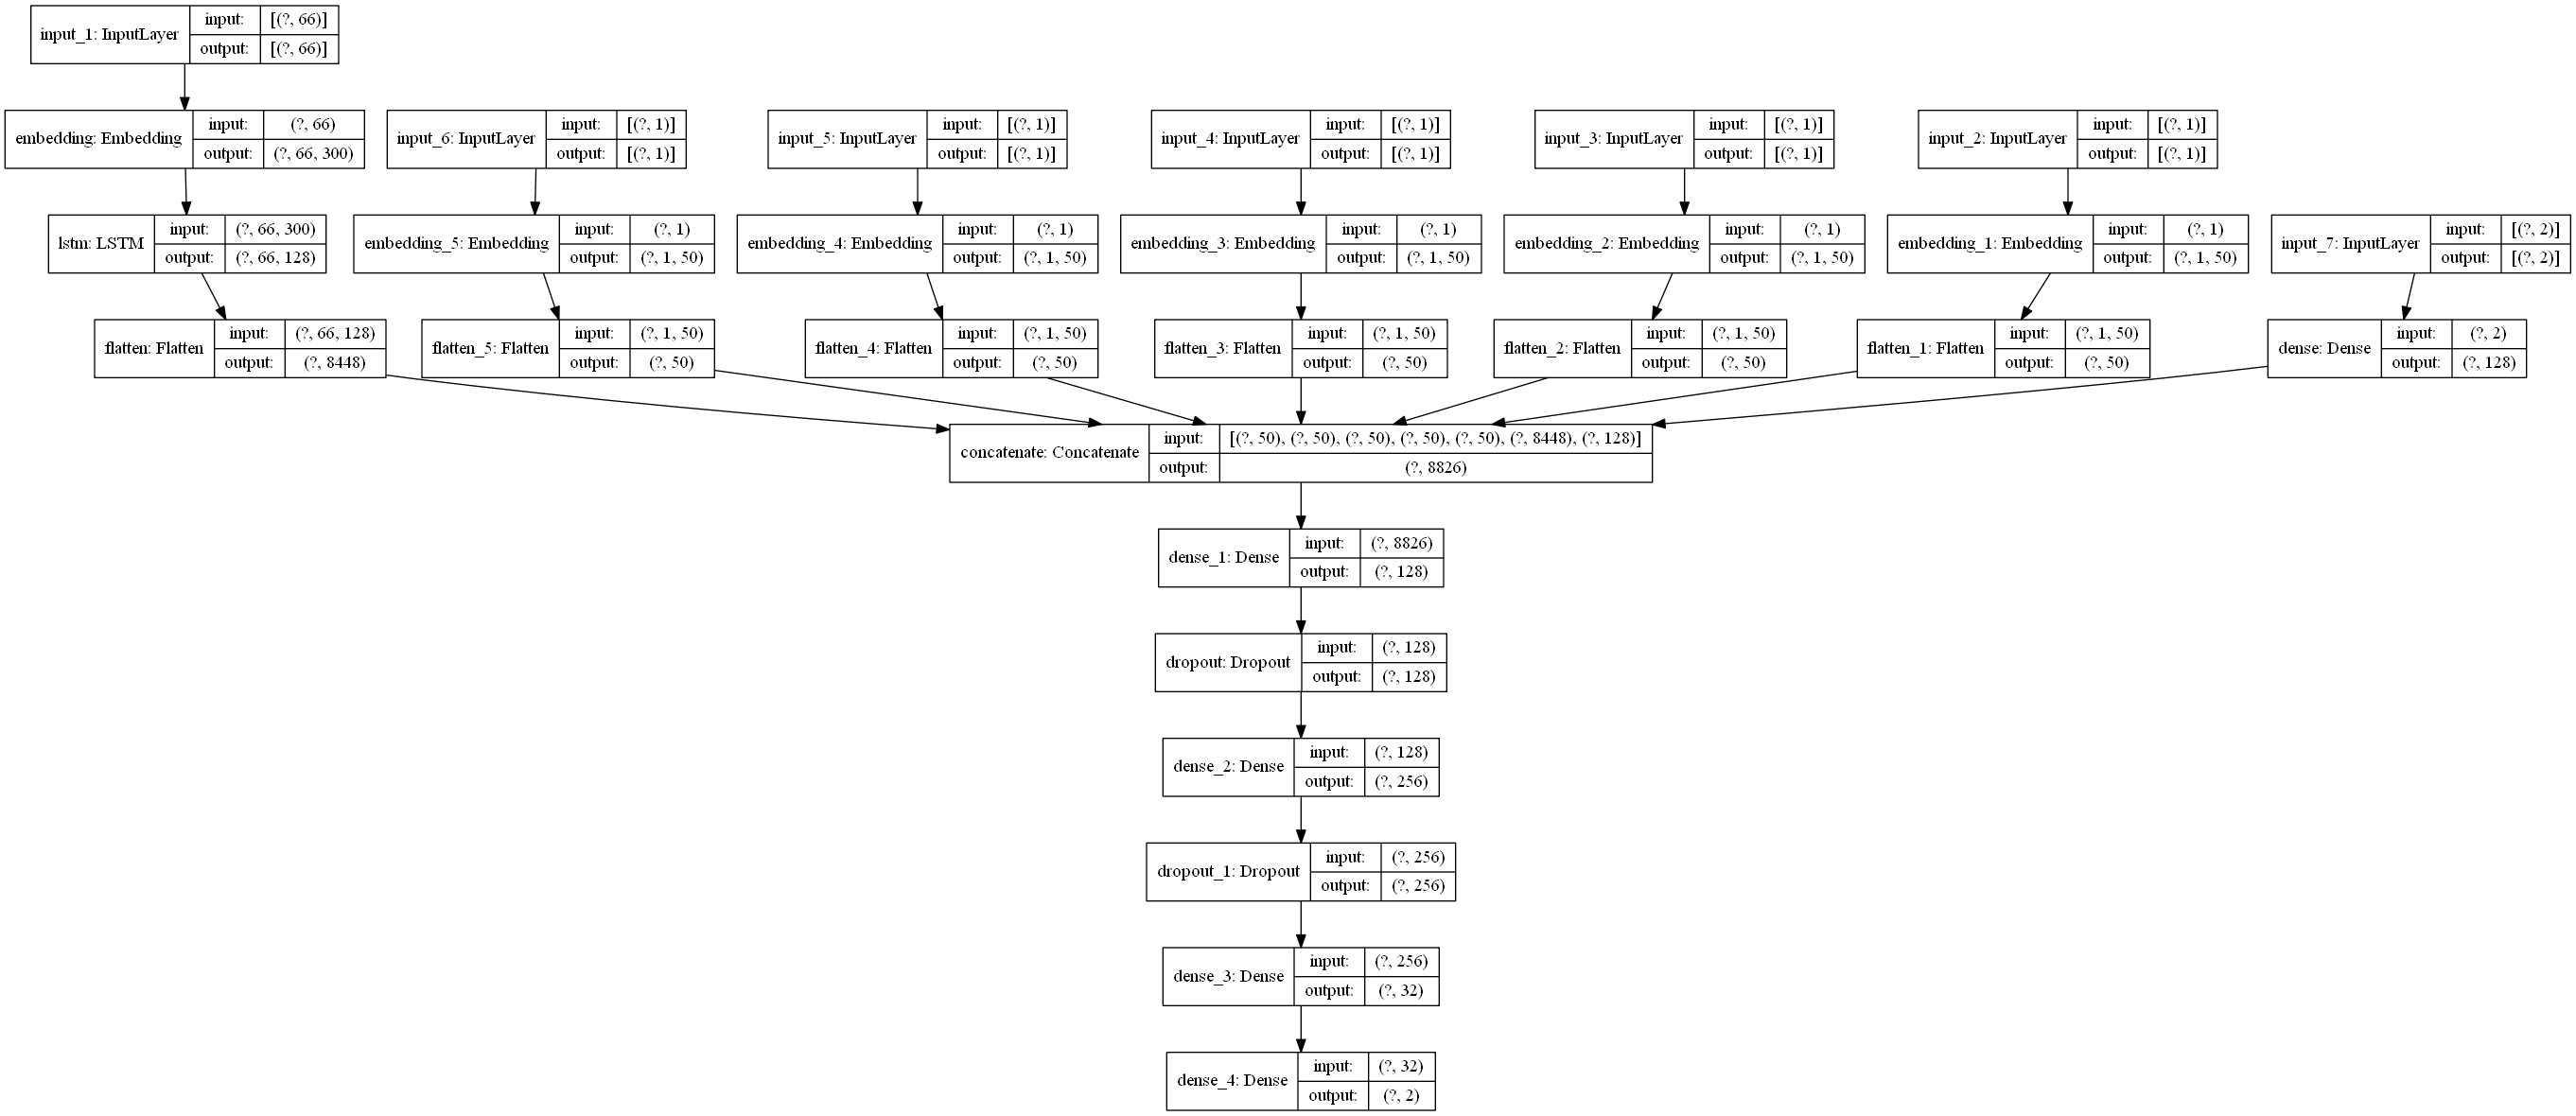

In [92]:
# plot model
plot_model(model2,to_file='C:/Users/shwer/OneDrive/Desktop/nyc pics/Documents/lstm_model2.png', show_shapes=True,show_layer_names=True)

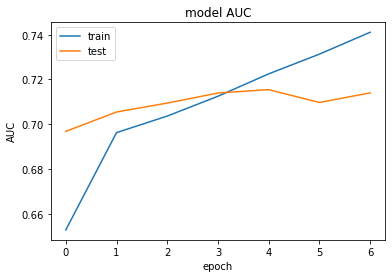

In [93]:
# Reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for Auc
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observations:
<b> AUC is increasing and decreasing after every few epochs. Not a good model. Need to make few changes in model to get better results </b>

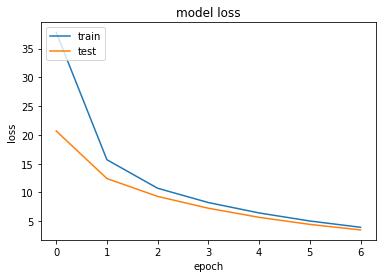

In [94]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observations:
<b> Loss is also not decreasing much and bad model comapred to the first model </b>

# Model 3 using one hot encoding

In [95]:
# Using One Hot encoding here
# School State

In [96]:
# School_State

In [97]:
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset

from sklearn.preprocessing import OneHotEncoder
train_state = pd.DataFrame(X_train['school_state'])
test_state = pd.DataFrame(X_test['school_state'])
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_train_state=enc.fit_transform(train_state).toarray()
print(encode_train_state.shape)
print(type(encode_train_state))
encode_test_state=enc.transform(test_state).toarray()
print(encode_test_state.shape)

(87398, 51)
<class 'numpy.ndarray'>
(21850, 51)


In [98]:
# Teacher Prefix
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset

from sklearn.preprocessing import OneHotEncoder
train_teacher_prefix = pd.DataFrame(X_train['teacher_prefix'])
test_teacher_prefix = pd.DataFrame(X_test['teacher_prefix'])
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_train_teacher_prefix=enc.fit_transform(train_teacher_prefix).toarray()
print(encode_train_teacher_prefix.shape)
print(type(encode_train_teacher_prefix))
encode_test_teacher_prefix=enc.transform(test_teacher_prefix).toarray()
print(encode_test_teacher_prefix.shape)


(87398, 5)
<class 'numpy.ndarray'>
(21850, 5)


In [99]:
# Grade Category
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset

from sklearn.preprocessing import OneHotEncoder
train_grade_category = pd.DataFrame(X_train['project_grade_category'])
test_grade_category = pd.DataFrame(X_test['project_grade_category'])
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_train_grade_category=enc.fit_transform(train_grade_category).toarray()
print(encode_train_grade_category.shape)
print(type(encode_train_grade_category))
encode_test_grade_category=enc.transform(test_grade_category).toarray()
print(encode_test_grade_category.shape)

(87398, 4)
<class 'numpy.ndarray'>
(21850, 4)


In [100]:
# Price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print(X_train_price_norm.shape)

X_train_price_norm = X_train_price_norm.reshape(-1,1)
print(X_train_price_norm.shape)


X_test_price_norm=X_test_price_norm.reshape(-1,1)
print(X_test_price_norm.shape)

(1, 87398)
(87398, 1)
(21850, 1)


In [101]:
# Teacher Previously Posted Projects
X_train_previously_posted_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previously_posted_norm = X_train_previously_posted_norm.reshape(-1,1)
print(X_train_previously_posted_norm.shape)
X_test_previously_posted_norm = X_test_previously_posted_norm.reshape(-1,1)
print(X_test_previously_posted_norm.shape)

(87398, 1)
(21850, 1)


In [102]:
#  Clean_Subcategories

In [103]:
len(X_train['clean_subcategories'].unique())

392

In [104]:
# Using One Hot encoding here
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset
vocab_size_clean_subcategories=392
from sklearn.preprocessing import OneHotEncoder
train_clean_subcategory = pd.DataFrame(X_train['clean_subcategories'])
test_clean_subcategory = pd.DataFrame(X_test['clean_subcategories'])
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_train_clean_subcategory=enc.fit_transform(train_clean_subcategory).toarray()
print(encode_train_clean_subcategory.shape)
print(type(encode_train_clean_subcategory))
encode_test_clean_subcategory=enc.transform(test_clean_subcategory).toarray()
print(encode_test_clean_subcategory.shape)

(87398, 392)
<class 'numpy.ndarray'>
(21850, 392)


In [105]:
# Clean Category
len(X_train['clean_categories'].unique())

51

In [106]:
# Using One Hot encoding here
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset
vocab_size_clean_categories=51
from sklearn.preprocessing import OneHotEncoder
train1 = pd.DataFrame(X_train['clean_categories'])
test1 = pd.DataFrame(X_test['clean_categories'])
enc = OneHotEncoder(handle_unknown = 'ignore')
encode_train_clean_category=enc.fit_transform(train1).toarray()
print(encode_train_clean_category.shape)
print(type(encode_train_clean_category))
encode_test_clean_category=enc.transform(test1).toarray()
print(encode_test_clean_category.shape)

(87398, 51)
<class 'numpy.ndarray'>
(21850, 51)


In [107]:
# Concatenating all columns for train and test data
X_tr = np.concatenate((encode_train_state,encode_train_teacher_prefix, encode_train_grade_category, X_train_price_norm, X_train_previously_posted_norm,encode_train_clean_subcategory,encode_train_clean_category), axis=1) # column wise
print(X_tr.shape)
print(type(X_tr))
X_te = np.concatenate((encode_test_state, encode_test_teacher_prefix, encode_test_grade_category, X_test_price_norm, X_test_previously_posted_norm,encode_test_clean_subcategory,encode_test_clean_category), axis=1) # Column wise
print(X_te.shape)
print(type(X_te))

(87398, 505)
<class 'numpy.ndarray'>
(21850, 505)
<class 'numpy.ndarray'>


In [108]:
# Adding the 3 rd dimension (Data_rows,features,1)
X_train_concat=np.expand_dims(X_tr, axis=2)
X_test_concat=np.expand_dims(X_te,axis=2)

In [110]:
# Model 3 Building
tensorflow.keras.backend.clear_session()
init = tensorflow.keras.initializers.he_normal()
regularizer = tensorflow.keras.regularizers.l2(0.05)

# essay
input_essay=Input(shape=(151,))
embedding_essay = Embedding(vocab_size_essay, 300, weights=[embedding_matrix], input_length=151, trainable=False)(input_essay)
lstm_layer=LSTM(64, return_sequences=True, return_state=False)(embedding_essay)
flat_essay=Flatten()(lstm_layer)

# Other combined columns
inp_combined_columns = Input((505,1))
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu', kernel_initializer=init,kernel_regularizer=regularizer)(inp_combined_columns)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer=init,kernel_regularizer=regularizer)(conv1)
flat_combined = Flatten()(conv2)

# concatenation 
concat = concatenate([flat_essay, flat_combined])

# layer
dense = Dense(units=64, activation='relu', kernel_initializer=init, kernel_regularizer=regularizer)(concat)
dropout = Dropout(rate=0.4)(dense)
dense2 = Dense(units=128, activation='relu', kernel_initializer=init, kernel_regularizer=regularizer)(dropout)
dropout1 = Dropout(rate=0.3)(dense2)
dense3 = Dense(units=32, activation='relu', kernel_initializer=init, kernel_regularizer=regularizer)(dropout1)

# output layer
output = Dense(units=2, activation='softmax')(dense3)


model3 = Model(inputs=[input_essay, inp_combined_columns], outputs=output)

model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 151)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 505, 1)]     0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 151, 300)     15488100    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 502, 32)      160         input_2[0][0]                    
______________________________________________________________________________________________

In [111]:
# train and test data
train_data2=[padded_essay_train,X_train_concat]
test_data2=[padded_essay_test,X_test_concat]

In [112]:
# compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auc])

In [113]:
 # Early stopping if validation accuracy is not improving in last 2 epochs
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_auc', patience=2, verbose=1,mode='max')
# Reference: https://stackoverflow.com/questions/54330586/training-keras-model-with-multiple-inputs
history=model3.fit(train_data2,tensorflow.keras.utils.to_categorical(y_train, 2),
          validation_data=(test_data2,tensorflow.keras.utils.to_categorical(y_test, 2)),epochs=15,batch_size=600,verbose=1,callbacks=[earlystop])

Train on 87398 samples, validate on 21850 samples
Epoch 1/15
87398/87398 [==============================] - 717s 8ms/sample - loss: 15.0443 - auc: 0.6377 - val_loss: 7.4638 - val_auc: 0.7115
Epoch 2/15
87398/87398 [==============================] - 675s 8ms/sample - loss: 4.7322 - auc: 0.7110 - val_loss: 2.9620 - val_auc: 0.7271
Epoch 3/15
87398/87398 [==============================] - 596s 7ms/sample - loss: 2.2324 - auc: 0.7211 - val_loss: 1.7194 - val_auc: 0.7317
Epoch 4/15
87398/87398 [==============================] - 570s 7ms/sample - loss: 1.4613 - auc: 0.7276 - val_loss: 1.2655 - val_auc: 0.7345
Epoch 5/15
87398/87398 [==============================] - 571s 7ms/sample - loss: 1.1137 - auc: 0.7334 - val_loss: 0.9895 - val_auc: 0.7394
Epoch 6/15
87398/87398 [==============================] - 574s 7ms/sample - loss: 0.8957 - auc: 0.7403 - val_loss: 0.8109 - val_auc: 0.7396
Epoch 7/15
87398/87398 [==============================] - 570s 7ms/sample - loss: 0.7410 - auc: 0.7486 - val_

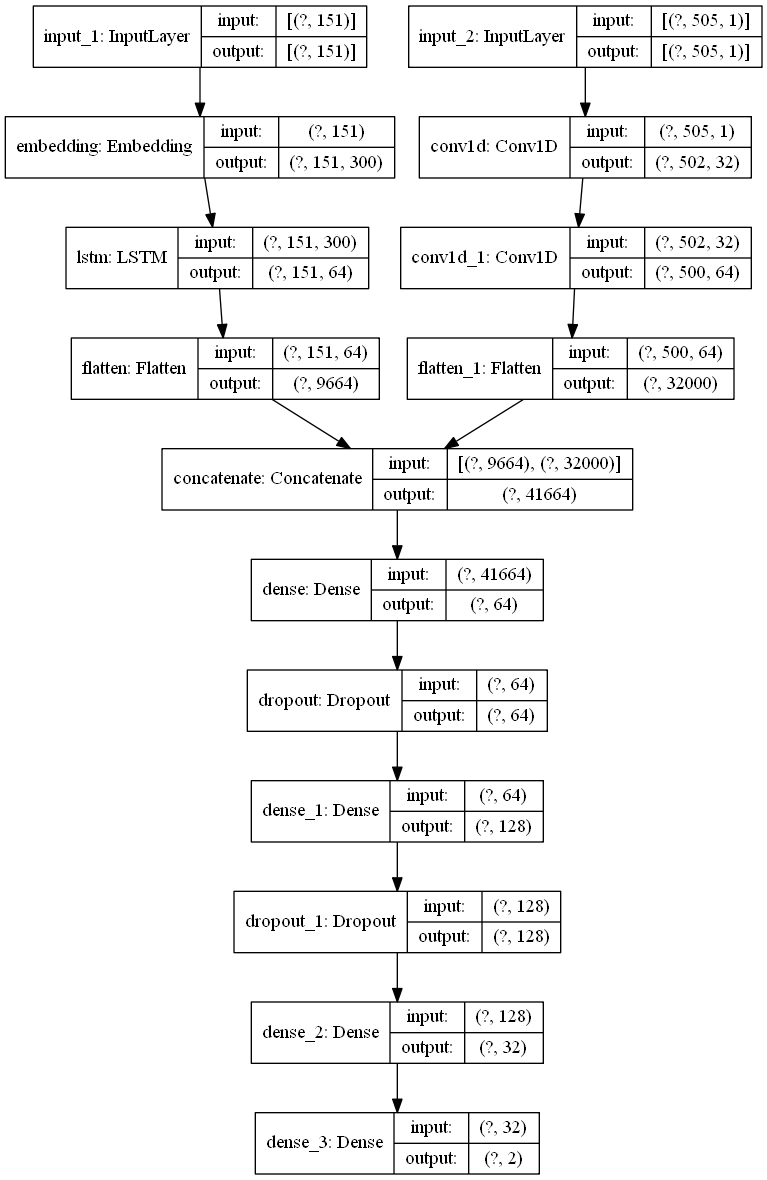

In [114]:
# plot model
plot_model(model3,to_file='C:/Users/shwer/OneDrive/Desktop/nyc pics/Documents/lstm_model3.png', show_shapes=True,show_layer_names=True)

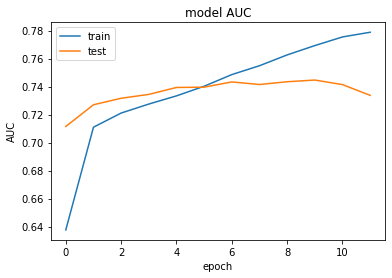

In [115]:
# Reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for Auc
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observations:
<b> AUC score is increasing in the begining but then increasing at very slow rate later </b>

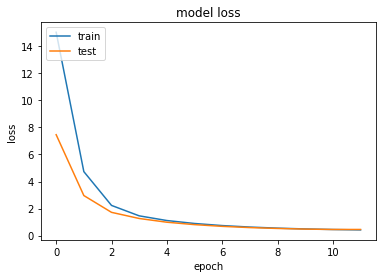

In [116]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observations:
<b> Loss is decreasing initially faster then at a very slow rate </b>

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "AUC", "Loss"]

x.add_row(["LSTM with Label Encoder with All Words", 0.7402, 0.4466])
x.add_row(["LSTM with label Encoder ignoring top and bottom IDF values words ", 0.7145 , 3.4955])
x.add_row(["LSTM model with One Hot Encoding features", 0.7338, 0.4534])
print(x)

+-------------------------------------------------------------------+--------+--------+
|                               Model                               |  AUC   |  Loss  |
+-------------------------------------------------------------------+--------+--------+
|               LSTM with Label Encoder with All Words              | 0.7402 | 0.4466 |
| LSTM with label Encoder ignoring top and bottom IDF values words  | 0.7145 | 3.4955 |
|             LSTM model with One Hot Encoding features             | 0.7338 | 0.4534 |
+-------------------------------------------------------------------+--------+--------+


# Conclusion: 
<b><br> LSTM with Label Encoder with All Wordsis the best among all including the all Machine Learning Models as well</b></br>
